<h3> Importing Important Libraries </h3>

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

# setting seaborn as default style
sns.set()
# sns.set_style('darkgrid', {'grid.color': '0.1', 'grid.linestyle': ':'})

In [135]:
data = 'housing.csv'

# Read data into pandas DataFrame

df = pd.read_csv(data)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<div>
<h3> Exploratory Data Analysis </h3>
</div>

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


Text(0.5, 0, 'Median house value')

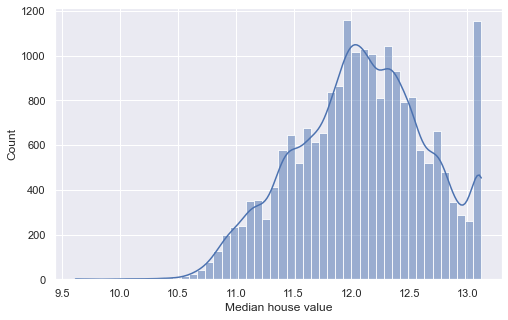

In [136]:
from pandas import unique


print(df.columns)

x = df['median_house_value']

plt.figure(figsize=((8, 5)))
sns.histplot(np.log(x), 
             kde=True,
             bins=50)
plt.xlabel('Median house value')

In [137]:
df.isnull().sum()

print("Total bedrooms column has 207 missing values")

Total bedrooms column has 207 missing values


In [138]:
pop_median = df['population'].median()

print(f"The median value of population is {pop_median}")


The median value of population is 1166.0


In [139]:
len(df)

20640

In [140]:
# Shuffling the data before splitting
n = len(df)

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)
idx


array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [141]:
# Splitting the Dataset into Train, Validation and Test sets

n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)  

print(f"Number of Train set: {n_train}" )
print(f"No of Validation set: {n_val}" )
print(f"No of Test set: {n_test}" )

Number of Train set: 12384
No of Validation set: 4128
No of Test set: 4128


In [142]:
df = df.set_index(idx) # Ressting the index

In [143]:
# Setting the validation framework
df_train = df.iloc[0: n_train]
df_val = df.iloc[n_train : n_train + n_val]
df_test = df.iloc[n_train + n_val : ]

# Extracting the target variable and using log transformation
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

In [144]:
# Dropping the target varaible
df_train = df_train.drop('median_house_value', axis=1)
df_val = df_val.drop('median_house_value', axis=1)
df_test = df_test.drop('median_house_value', axis=1)

Text(0.5, 0, 'Target values')

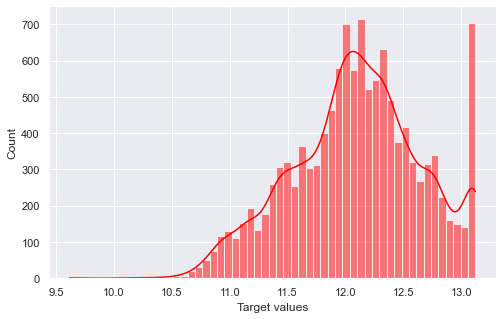

In [145]:
fig, axes = plt.subplots(figsize=((8, 5)))
sns.histplot(y_train, 
             kde=True,
             color='red')

plt.xlabel('Target values')

In [146]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [147]:
# Dealing with missing values

df_train['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

df_train.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

<h3> Encoding categorical variable, 'ocean proximity' </h3>

In [148]:
df_train['ocean_proximity'] = pd.factorize(df_train['ocean_proximity'])[0]
df_val['ocean_proximity'] = pd.factorize(df_val['ocean_proximity'])[0]
df_test['ocean_proximity'] = pd.factorize(df_test['ocean_proximity'])[0]
# df_train

In [149]:
df_train.head()

type(df.values)

numpy.ndarray

In [150]:
ones = np.ones(df_train.shape[0])
X = np.column_stack([ones, df_train])
X[2]

array([ 1.0000e+00, -1.2224e+02,  3.7850e+01,  5.2000e+01,  1.4670e+03,
        1.9000e+02,  4.9600e+02,  1.7700e+02,  7.2574e+00,  0.0000e+00])

<h3> Defining the Linear Regression Train Function </h3>

In [151]:
def train_lr(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [152]:
df_train['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)
df_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [153]:
w0, w = train_lr(df_train, y_train)

In [154]:
y_pred = w0 + df_train.dot(w)
y_pred.shape
# y_val

(12384,)

<h3> Root Mean Square Error </h3>

In [155]:
def rmse(y, y_pred):
    error = y - y_pred
    squared_error = error ** 2
    mean_squared_error = squared_error.mean()
                          
    return np.sqrt(mean_squared_error)
    

In [156]:
score = rmse(y_pred, y_train)
score = round(score, 2)
score

0.34

<AxesSubplot: title={'center': 'Target'}, ylabel='Count'>

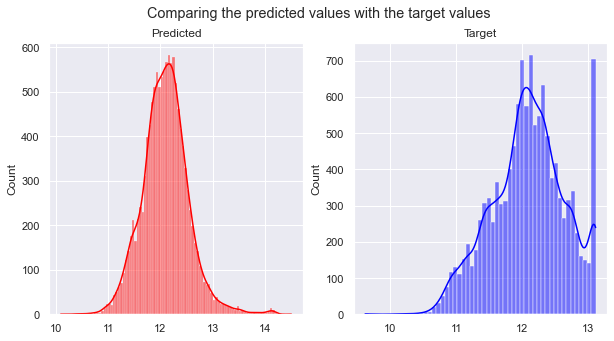

In [157]:

fig, axes=plt.subplots(1, 2, figsize = ((10, 5)))
fig.suptitle("Comparing the predicted values with the target values")
axes[0].set_title('Predicted')
sns.histplot(y_pred, 
             kde=True,
             color='red', 
             ax=axes[0])
axes[1].set_title('Target')
sns.histplot(y_train, 
             kde=True,
             color='blue', 
             ax=axes[1])

<h3> Regularized Linear Regression </h3>

In [158]:
def prepare_X(df):
    df = df.fillna(0)
    X = df.values
    return X

In [159]:
X_null_train = prepare_X(df_train)
X_null_val = prepare_X(df_val)

X_null_train.shape
X_null_val.shape

(4128, 9)

In [160]:
# Definining the linear regression function using normal equation
def train_lr_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + 0.01 * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y) # normal equation
    
    return w_full[0], w_full[1:]

In [175]:
 
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_lr_reg(df_train, y_train, r=r)

    y_null_val = w0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_null_val, y_val), 3)
    print(r, ':', rmse_val)


0 : 0.405
1e-06 : 0.405
0.0001 : 0.405
0.001 : 0.405
0.01 : 0.405
0.1 : 0.405
1 : 0.405
5 : 0.405
10 : 0.405
